#### **Model Training**

- **Libraries**

In [230]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import joblib
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

scaler = MinMaxScaler()
encoder = LabelEncoder()



- **load the Cleaned and encoded Data**

In [233]:
df2 = pd.read_csv(r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\data\Crop_recommendation_cleaned.csv")
df2.head()


,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,94.867624,rice
2,60,55,44,23.004459,82.320763,7.840207,94.867624,rice
3,74,35,40,26.491096,80.158363,6.980401,94.867624,rice
4,78,42,42,20.130175,81.604873,7.628473,94.867624,rice


- **Feature and Target Variables** 

In [234]:
df2["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [175]:
df2.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [176]:
features= ['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall']
target= 'label'

X=df2[features]
Y=df2[target]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#### **Transformation**

In [177]:
X_scaled = scaler.fit_transform(X)
Y_scaled = encoder.fit_transform(Y)

#### **Split**

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y_scaled,test_size = 0.2,random_state = 42)

## **Linear Models**

#### **Logistic Regression**

In [179]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

  - **Prediction**

In [180]:

y_pred = log_reg.predict(X_train)
print(y_pred[:6])
y_pred_test = log_reg.predict(X_test)
print(y_pred_test[:6])



[16  2 10  1 12 11]
[15 21 17 17  0 12]


#### **Evaluation**

- **MAE**

In [181]:
training_mae_lr =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_lr:.2f}");
test_mae_lr= mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_lr:.2f}"));

Training MAE: 0.54
Test MAE: 0.58
None


- **Accuracy**

In [182]:
mas_train_lr= metrics.accuracy_score(y_train, y_pred)
print(f"Logistic Regression's Train Accuracy is: {mas_train_lr:.2f}");
mas_test_lr = metrics.accuracy_score(y_test, y_pred_test)
print(f"Logistic Regression's Test Accuracy is: {mas_test_lr:.2f}");

Logistic Regression's Train Accuracy is: 0.94
Logistic Regression's Test Accuracy is: 0.93


- **Confusion Matrix**

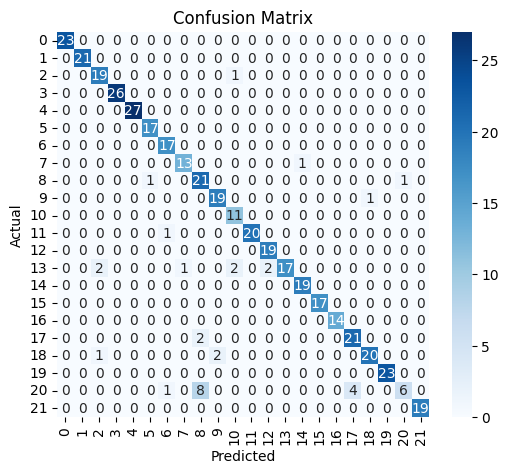

In [183]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **Precision,Recall and F1 Score**

In [184]:
# Precision and recall (macro average for multiclass)
precision_lr = precision_score(y_test, y_pred_test, average='macro')
recall_lr = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
f1_lr = f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_lr:.2f}")


Precision: 0.93
Recall: 0.93
F1-score:0.92


#### **Cross Validation**

In [185]:
# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores = cross_val_score(log_reg, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_lr= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_lr)

Cross-validation accuracies: [0.93863636 0.95681818 0.95454545 0.95       0.96136364]
0.95


## **Non-Linear Models**

#### **Decision Tree Classifier**

- **Base Model** 

In [186]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)

DecisionTree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

- **Predict Values**

In [187]:
y_pred = DecisionTree.predict(X_train)
print(y_pred[:6])
y_pred_test = DecisionTree.predict(X_test)
print(y_pred_test[:5])



[16  2 10  1 12 11]
[15 21 17 17  0]


#### **Evaluation**

- **MAE**

In [188]:
training_mae_dtc =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_dtc:.2f}");
test_mae_dtc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_dtc:.2f}"));

Training MAE: 0.76
Test MAE: 1.05
None


- **Accuracy**

In [189]:
mas_train_dtc= metrics.accuracy_score(y_train, y_pred)
print(f"DecisionTrees's Train Accuracy is: {mas_train_dtc:.2f}");
mas_test_dtc= metrics.accuracy_score(y_test, y_pred_test)
print(f"DecisionTrees's Test Accuracy is: {mas_test_dtc:.2f}");

DecisionTrees's Train Accuracy is: 0.92
DecisionTrees's Test Accuracy is: 0.89


- **Precision,Recall and F1 Score**

In [190]:
# Precision and recall (macro average for multiclass)
precision_dtc = precision_score(y_test, y_pred_test, average='macro')
recall_dtc = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_dtc:.2f}")
print(f"Recall: {recall_dtc:.2f}")
f1_dtc = f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_dtc:.2f}")

Precision: 0.88
Recall: 0.90
F1-score:0.88


- #### **Cross Validation**

In [191]:
# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores = cross_val_score(DecisionTree, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_dtc= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_dtc)

Cross-validation accuracies: [0.88636364 0.90681818 0.89545455 0.94318182 0.89545455]
0.91


### **RandomForestClassifier**

- #### **RF-Model**

In [192]:
Model_rf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42, max_depth=5)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

- #### **Prediction**

In [193]:
y_pred = Model_rf.predict(X_train)
print(y_pred[:6])
y_pred_test = Model_rf.predict(X_test)
print(y_pred_test[:5])

[16  2 10  1 12 11]
[15 21 17 17  0]


#### **Evaluation**

- **MAE**

In [194]:
training_mae_rf=mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_rf:.2f}");
test_mae_rf = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_rf:.2f}"));

Training MAE: 0.12
Test MAE: 0.23
None


- **Accuracy**

In [195]:
mas_train_rf = metrics.accuracy_score(y_train, y_pred)
print(f"RFC's Train Accuracy is: {mas_train_rf:.2f}");
mas_test_rf= metrics.accuracy_score(y_test, y_pred_test)
print(f"RFC's Test Accuracy is: {mas_test_rf:.2f}");

RFC's Train Accuracy is: 0.99
RFC's Test Accuracy is: 0.98


- **Confusion Matrix**

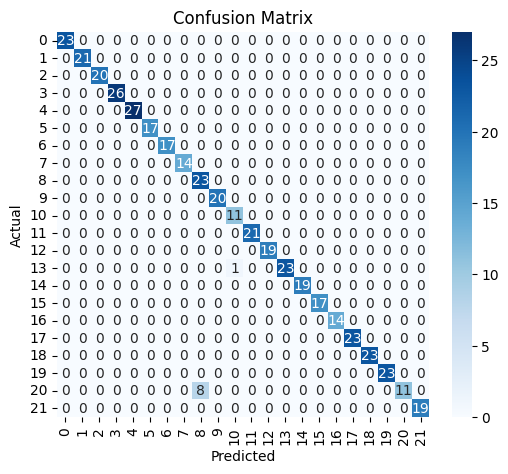

In [196]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



- **Precision and Recall**

In [197]:
# Precision and recall (macro average for multiclass)
precision_rf = precision_score(y_test, y_pred_test, average='macro')
recall_rf = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
f1_rf= f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_rf:.2f}")



Precision: 0.98
Recall: 0.98
F1-score:0.98


- #### **Cross Validation**

In [198]:
# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores = cross_val_score(Model_rf, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_rf= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_rf)

Cross-validation accuracies: [0.98636364 0.98636364 0.97954545 0.98863636 0.99090909]
0.99


### **Support Vector Classifier**

In [199]:
svm_model = SVC(kernel='rbf', random_state=2)
svm_model.fit(X_train,y_train)

SVC(random_state=2)

- #### **Prediction**

In [200]:
y_pred = svm_model.predict(X_train)
print(y_pred[:6])
y_pred_test = svm_model.predict(X_test)
print(y_pred_test[:6])

[16  2 10  1 12 11]
[15 21 17 17  0 12]


- #### **Evaluation**

- **MAE**

In [201]:
train_mae_svc=mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {train_mae_svc:.2f}");
test_mae_svc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_svc:.2f}"));

Training MAE: 0.15
Test MAE: 0.30
None


- **Accuracy**

In [202]:
train_acc_svc = metrics.accuracy_score(y_train, y_pred)
print(f"SVM's Train Accuracy is: {train_acc_svc:.2f}");
test_acc_svc= metrics.accuracy_score(y_test, y_pred_test)
print(f"SVM's Test Accuracy is: {test_acc_svc:.2f}");

SVM's Train Accuracy is: 0.99
SVM's Test Accuracy is: 0.97


- #### **Confusion matrix**

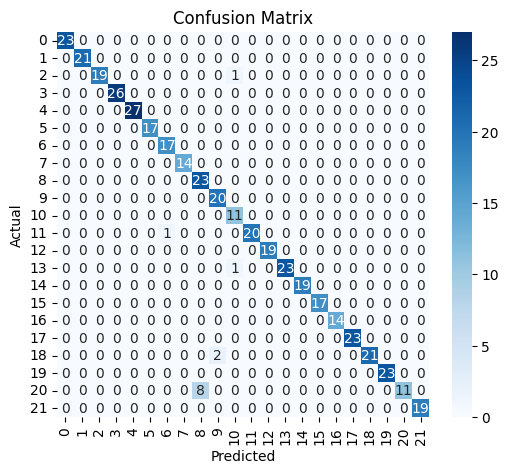

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
plt.tight_layout()


- **Precision and recall**

In [204]:
# Precision and recall (macro average for multiclass)
precision_svc = precision_score(y_test, y_pred_test, average='macro')
recall_svc = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_svc:.2f}")
print(f"Recall: {recall_svc:.2f}")
f1_svc = f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_svc:.2f}")

Precision: 0.97
Recall: 0.97
F1-score:0.97


- #### **Cross Validation**

In [205]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores_svm = cross_val_score(svm_model, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_svc=round(scores.mean(),2)


#### **XGBClassifier**

In [206]:
xgb_Model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, max_depth=5)
xgb_Model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

- **Prediction**

In [207]:
y_pred = xgb_Model.predict(X_train)
print(y_pred[:6])
y_pred_test = xgb_Model.predict(X_test)
print(y_pred_test[:6])

[16  2 10  1 12 11]
[15 21 17 17  0 12]


#### **Evaluation**

- **MAE**

In [208]:
training_mae_xgbc =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_xgbc:.2f}");
test_mae_xgbc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_xgbc:.2f}"));

Training MAE: 0.00
Test MAE: 0.12
None


- **Accuracy**

In [209]:
mas_train_xgbc = metrics.accuracy_score(y_train, y_pred)
print(f"XGBC's Train Accuracy is: {mas_train_xgbc:.2f}");
mas_test_xgbc = metrics.accuracy_score(y_test, y_pred_test)
print(f"XGBC's Test Accuracy is: {mas_test_xgbc:.2f}");

XGBC's Train Accuracy is: 1.00
XGBC's Test Accuracy is: 0.99


- **Precision, Recall, F1**

In [210]:
precision_xgbc = precision_score(y_test, y_pred_test, average='macro')
recall_xgbc = recall_score(y_test, y_pred_test, average='macro')
f1_xgbc = f1_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_xgbc:.2f}")
print(f"Recall:    {recall_xgbc:.2f}")
print(f"F1-score:  {f1_xgbc:.2f}")

Precision: 0.99
Recall:    0.99
F1-score:  0.99


- **Confusion Matrix**

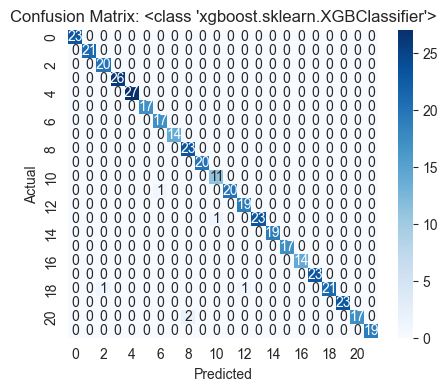

<Figure size 640x480 with 0 Axes>

In [229]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix: {XGBClassifier}')
plt.show()
save_path = r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\reports\figures"
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, "confusion_matrix.png"), dpi=300)
plt.show()


- #### **Cross Validation**



In [212]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores_svm = cross_val_score(xgb_Model, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_xgbc=round(scores.mean(),2)


#### **Best Model Recommendation**

In [217]:
metrics_df = pd.DataFrame({
    "Logistic Regression": [
        round(precision_lr, 2), 
        round(recall_lr, 2), 
        round(f1_lr, 2), 
        round(test_mae_lr, 2),
        round(training_mae_lr, 2),
        round(mas_train_lr, 2), 
        round(mas_test_lr, 2),
        round(Mean_Accuracy_lr,2)
    ]
}, index=[
    'Precision', 
    'Recall', 
    'F1-score',
    'Mean Absolute Error training', 
    'Mean Absolute Error test',
    'Train Accuracy',
    'Test Accuracy',
    'mean accuracy validation'
    
])
metrics_df["DTC"] = [
        round(precision_dtc, 2), 
        round(recall_dtc, 2), 
        round(f1_dtc, 2), 
        round(test_mae_dtc, 2),
        round(training_mae_dtc, 2),
        round(mas_train_dtc, 2), 
        round(mas_test_dtc, 2),
        round(Mean_Accuracy_dtc,2)
]
metrics_df["RFC"] = [
        round(precision_rf, 2), 
        round(recall_rf, 2), 
        round(f1_rf, 2), 
        round(test_mae_rf, 2),
        round(training_mae_rf, 2),
        round(mas_train_rf, 2), 
        round(mas_test_rf, 2),
        round(Mean_Accuracy_rf,2)
]
metrics_df["SVM"] = [
    round(precision_svc, 2), 
        round(recall_svc, 2), 
        round(f1_lr, 2), 
        round(test_mae_svc, 2),
        round(train_mae_svc, 2),
        round(train_acc_svc, 2), 
        round(test_acc_svc, 2),
        round(Mean_Accuracy_svc,2)
]
metrics_df["XGBC"] = [
    round(precision_xgbc, 2), 
        round(recall_xgbc, 2), 
        round(f1_xgbc, 2), 
        round(test_mae_xgbc, 2),
        round(training_mae_xgbc, 2),
        round(mas_train_xgbc, 2), 
        round(mas_test_xgbc, 2),
        round(Mean_Accuracy_xgbc,2)
]

print(metrics_df)
# Define save path
save_path = r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\reports\figures"
os.makedirs(save_path, exist_ok=True)


                              Logistic Regression   DTC   RFC   SVM  XGBC
Precision                                    0.93  0.88  0.98  0.97  0.99
Recall                                       0.93  0.90  0.98  0.97  0.99
F1-score                                     0.92  0.88  0.98  0.92  0.99
Mean Absolute Error training                 0.58  1.05  0.22  0.30  0.12
Mean Absolute Error test                     0.54  0.76  0.12  0.15  0.00
Train Accuracy                               0.94  0.92  0.99  0.99  1.00
Test Accuracy                                0.93  0.89  0.98  0.97  0.99
mean accuracy validation                     0.95  0.91  0.99  0.99  0.99


In [ ]:
# 3. PREPARE DATA FOR PLOTTING
# Reset index to make 'Metric' a column, then melt for Seaborn
df_plot = metrics_df.reset_index().rename(columns={'index': 'Metric'})
df_melted = df_plot.melt(id_vars="Metric", var_name="Model", value_name="Score")

# Separate Error Metrics (lower is better) from Performance Metrics (higher is better)
error_metrics = ['Mean Absolute Error training', 'Mean Absolute Error test']
perf_metrics = [m for m in df_plot['Metric'].unique() if m not in error_metrics]

df_perf = df_melted[df_melted['Metric'].isin(perf_metrics)]
df_error = df_melted[df_melted['Metric'].isin(error_metrics)]


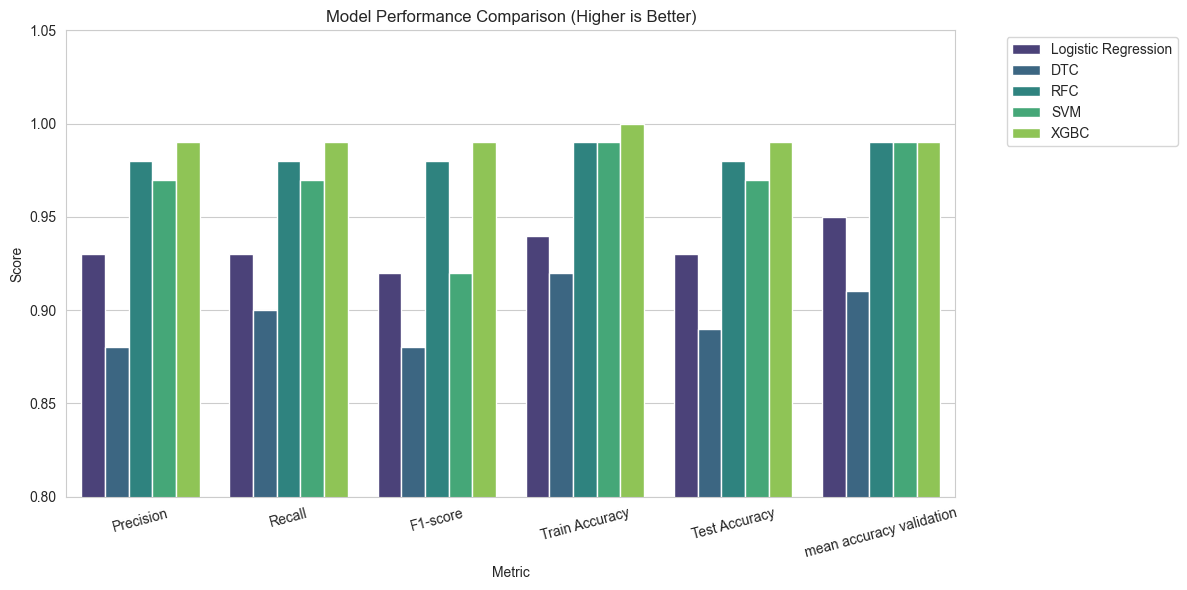

In [ ]:

# 4. PLOT 1: PERFORMANCE (Accuracy, F1, Precision, Recall)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_perf, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Model Performance Comparison (Higher is Better)")
plt.ylim(0.8, 1.05) # Zoom in for better visibility of high scores
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, "final_performance_metrics.png"), dpi=300)
plt.show()

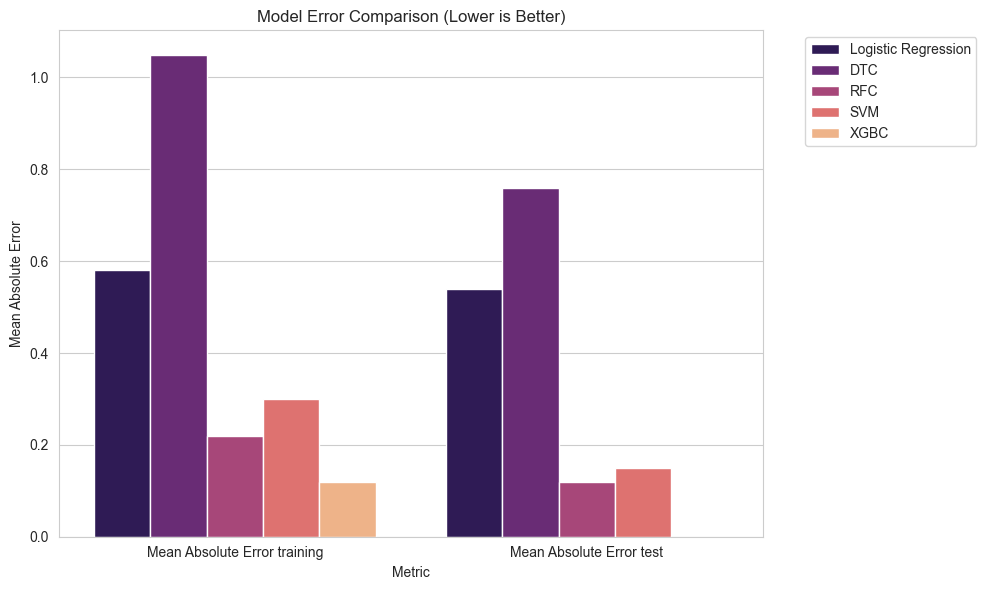

In [220]:
# 5. PLOT 2: ERROR (MAE)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_error, x="Metric", y="Score", hue="Model", palette="magma")
plt.title("Model Error Comparison (Lower is Better)")
plt.ylabel("Mean Absolute Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, "final_error_metrics.png"), dpi=300)
plt.show()

**Selected Final Model**
- 🏆 Final Model: XGBoost Classifier (XGBC)

Justification:
- Highest Test Accuracy (0.99)
- Lowest Test MAE (0.12)
- Excellent generalization with no significant overfitting
- Handles nonlinear patterns and feature interactions exceptionally well
- Efficient and stable for deployment in real-time applications
**The XGBoost model was therefore selected as the final model for deployment in the Crop Recommendation System.**

#### **Feature importance from the trained XGBoost model**

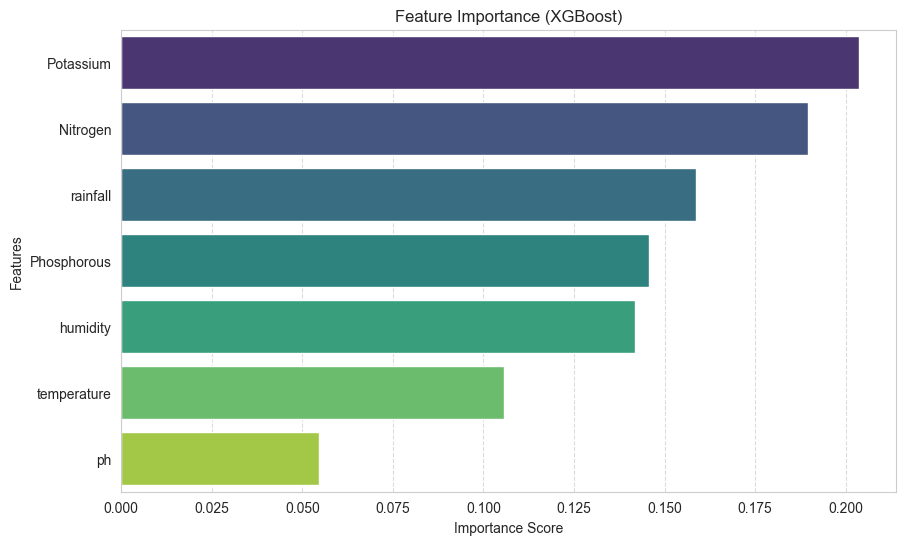

In [228]:
importance = xgb_Model.feature_importances_

# 2. Create a DataFrame for plotting
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Save for report
plt.savefig("../reports/figures/feature_importance.png", dpi=300)
plt.show()

#### **Saving the Model**

In [ ]:
# 1. Setup Path
save_dir = r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\saved_models"
os.makedirs(save_dir, exist_ok=True)

# 2. Re-create the Label Encoder (Just to be safe)
# We assume 'df' is your dataframe and has the 'label' column
if 'df' in locals():
    le = LabelEncoder()
    le.fit(df['label']) # Re-learn the mappings (Rice->1, Maize->2)
    print("Label Encoder re-fitted successfully.")
else:
    # If df isn't loaded, load it quickly
    df_temp = pd.read_csv(r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\data\Crop_recommendation.csv")
    le = LabelEncoder()
    le.fit(df_temp['label'])
    print("Loaded data and re-fitted Label Encoder.")

# 3. Save Everything
joblib.dump(xgb_Model, os.path.join(save_dir, "crop_recommendation_model.pkl"))
joblib.dump(scaler,    os.path.join(save_dir, "scaler.pkl"))
joblib.dump(le,        os.path.join(save_dir, "label_encoder.pkl"))

print(f"✅ Success! All 3 files saved to: {save_dir}")

Loaded data and re-fitted Label Encoder.
✅ Success! All 3 files saved to: C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\saved_models
